# Plots the State Transition Graph

Plots STG for a couple of boolean networks. Note that for large networks the STG can be very large.

In [1]:
import graphviz
#
from cana.datasets.bio import MARQUESPITA

In [2]:
%matplotlib inline

In [3]:
N = MARQUESPITA()
print(N)
for node in N.nodes:
    print(node)

<BNetwork(name='Marques-Pita & Rocha', N=7, Nodes=['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'])>
<BNode(id=0, name='One', k=0, inputs=[], state='1', outputs=[1] constant=True)>
<BNode(id=1, name='Two', k=0, inputs=[], state='1', outputs=[1] constant=True)>
<BNode(id=2, name='Three', k=0, inputs=[], state='1', outputs=[1] constant=True)>
<BNode(id=3, name='Four', k=0, inputs=[], state='1', outputs=[1] constant=True)>
<BNode(id=4, name='Five', k=0, inputs=[], state='1', outputs=[1] constant=True)>
<BNode(id=5, name='Six', k=0, inputs=[], state='1', outputs=[1] constant=True)>
<BNode(id=6, name='Seven', k=6, inputs=[0,1,2,3,4,5], state='0', outputs=[0,0,0,0...0,0,0,0] constant=False)>


In [4]:
STG = N.state_transition_graph()
print(STG.nodes(data=True))
attractors = N.attractors(mode='stg')
print('STG: %s' % (attractors))
attractors_ = N.attractors(mode='bns')
print('BNS: %s' % (attractors_))

[(0, {'label': '1111110'}), (1, {'label': '1111111'})]
STG: [[0]]
'BNS' could not be found! You must have it compiled or download the binary for your system from the 'bns' website (https://people.kth.se/~dubrova/bns.html).
BNS: []


Nodes: 2 | Edges: 2


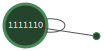

In [5]:
# Draw the State Transition Graph
G = graphviz.Digraph(name='State Transition Graph', engine='neato')
G.attr('graph', concentrate='true', simplify='true', overlap='true')
G.attr('node', shape='circle', fixedsize='true', width='.4', color='#488957', style='filled', fillcolor='#24442b', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='9')
G.attr('edge', arrowhead='normal', arrowsize='.1', color='#545454')

for node,d in STG.nodes(data=True):
    if any(node in attractor for attractor in attractors): #node in attractors:
        label = d['label']
        width = '0.6'
        penwidth = '3'
    else:
        label = ''
        width = '0.1'
        penwidth = '1'
    G.node(name=str(node), label=label, width=width, penwidth=penwidth)
for s, t, d in STG.edges(data=True):
    G.edge(str(s),str(t))
print('Nodes: %d | Edges: %d' % (len(STG.nodes()) , len(STG.edges()) ))
display(G)